<a href="https://colab.research.google.com/github/mutturajiu/BA05-TRIM02-Module-04-Text-Analytics-/blob/master/Text_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
import re

In [0]:
Data  = pd.read_csv('TweetSent.csv', encoding = "utf8")

In [35]:
no_records1 = len(Data)
print(no_records1)

5968


In [36]:
Data.head()

Tweet  Category
0                                      Not Available  negative
1  IOS 9 App Transport Security. Mm need to check...   neutral
2  Mar if you have an iOS device, you should down...   neutral
3  @jimmie_vanagon my phone does not run on lates...  negative
4  Not sure how to start your publication on iOS?...  positive

In [37]:
Data.describe()

Tweet  Category
count            5968      5968
unique           5418         4
top     Not Available  positive
freq              546      2888

In [38]:
Data[Data['Category'] == 'positive'].head(5)



Tweet  Category
4   Not sure how to start your publication on iOS?...  positive
10  Parkrun app for iOS downloaded Where have you ...  positive
11  Today @YouTubeGaming launches, with apps for i...  positive
12  Got a project you want to work on? Need help w...  positive
13  Met with iOS Developer today. We may have a "g...  positive

In [39]:
Data[Data['Category'] == 'negative'].head(5)


Tweet  Category
0                                       Not Available  negative
3   @jimmie_vanagon my phone does not run on lates...  negative
29  @_tomcc @bartwerf please stop walking and work...  negative
36  @DeltaAssist yes, I asked an attendant to prin...  negative
78                                      Not Available  negative

In [40]:
Data[Data['Category'] == 'neutral'].head(5)

Tweet Category
1  IOS 9 App Transport Security. Mm need to check...  neutral
2  Mar if you have an iOS device, you should down...  neutral
5  Two Dollar Tuesday is here with Forklift 2, Qu...  neutral
6  If you're not already signed up to test my iOS...  neutral
7  YouTube Gaming Officially Launches On Web, And...  neutral

In [41]:
Data.shape

(5968, 2)

In [42]:
Data["Category"].value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

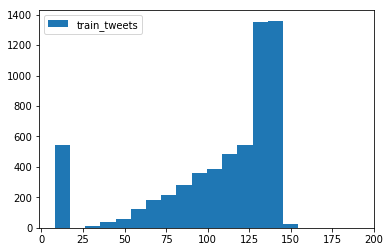

In [43]:
length_train = Data['Tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.legend()
plt.show()

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [0]:
Data['Clean_tweet'] = np.vectorize(remove_pattern)(Data['Tweet'], "@[\w]*")


In [46]:
Data.head()

Tweet  ...                                        Clean_tweet
0                                      Not Available  ...                                      Not Available
1  IOS 9 App Transport Security. Mm need to check...  ...  IOS 9 App Transport Security. Mm need to check...
2  Mar if you have an iOS device, you should down...  ...  Mar if you have an iOS device, you should down...
3  @jimmie_vanagon my phone does not run on lates...  ...   my phone does not run on latest IOS which may...
4  Not sure how to start your publication on iOS?...  ...  Not sure how to start your publication on iOS?...

[5 rows x 3 columns]

In [48]:
Data['Clean_tweet'] = Data['Clean_tweet'].str.replace("[^a-zA-Z#]", " ")
Data.head(10)

Tweet  ...                                        Clean_tweet
0                                      Not Available  ...                                      Not Available
1  IOS 9 App Transport Security. Mm need to check...  ...  IOS   App Transport Security  Mm need to check...
2  Mar if you have an iOS device, you should down...  ...  Mar if you have an iOS device  you should down...
3  @jimmie_vanagon my phone does not run on lates...  ...   my phone does not run on latest IOS which may...
4  Not sure how to start your publication on iOS?...  ...  Not sure how to start your publication on iOS ...
5  Two Dollar Tuesday is here with Forklift 2, Qu...  ...  Two Dollar Tuesday is here with Forklift    Qu...
6  If you're not already signed up to test my iOS...  ...  If you re not already signed up to test my iOS...
7  YouTube Gaming Officially Launches On Web, And...  ...  YouTube Gaming Officially Launches On Web  And...
8  YouTube Gaming Launches Tomorrow with iOS and ...  ...  YouTube Gaming Launches Tomorrow with iOS and ...
9  @astrill Yashan from BBC @bbcchinese the VPN a...  ...   Yashan from BBC  the VPN access on IOS may be...

[10 rows x 3 columns]

In [0]:
Data['Clean_tweet'] = Data['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [51]:
Data.head()

Tweet  ...                                        Clean_tweet
0                                      Not Available  ...                                          Available
1  IOS 9 App Transport Security. Mm need to check...  ...  Transport Security need check party network su...
2  Mar if you have an iOS device, you should down...  ...              have device should download http uDnD
3  @jimmie_vanagon my phone does not run on lates...  ...  phone does latest which account problem other ...
4  Not sure how to start your publication on iOS?...  ...  sure start your publication live helping with ...

[5 rows x 3 columns]

In [0]:
tokenized_tweet = Data['Clean_tweet'].apply(lambda x: x.split()) # tokenizing

In [53]:
tokenized_tweet.head()

0                                          [Available]
1    [Transport, Security, need, check, party, netw...
2         [have, device, should, download, http, uDnD]
3    [phone, does, latest, which, account, problem,...
4    [sure, start, your, publication, live, helping...
Name: Clean_tweet, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
Data['Clean_tweet'] = tokenized_tweet

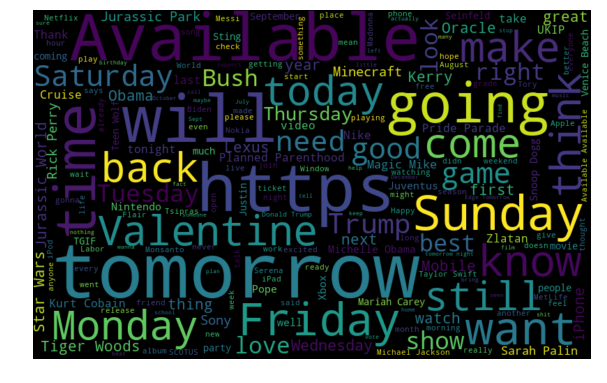

In [56]:
all_words = ' '.join([text for text in Data['Clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

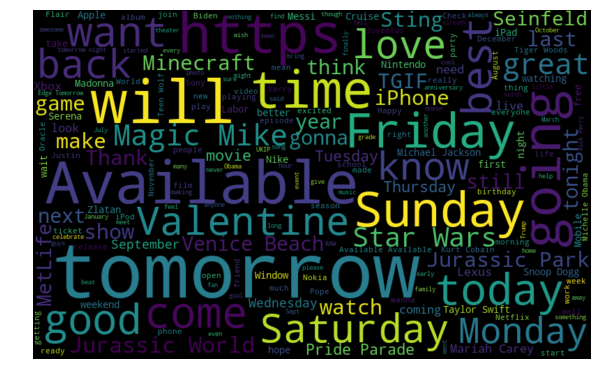

In [59]:
positive_words =' '.join([text for text in Data['Clean_tweet'][Data['Category'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

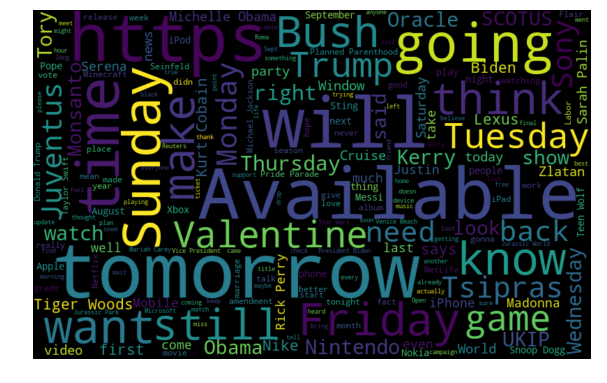

In [60]:
neutral_words =' '.join([text for text in Data['Clean_tweet'][Data['Category'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


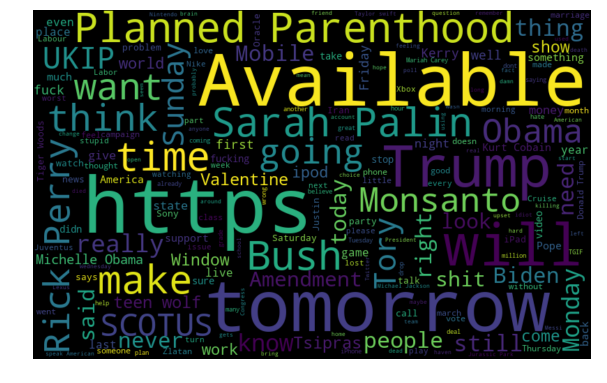

In [61]:
negative_words =' '.join([text for text in Data['Clean_tweet'][Data['Category'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from positive,negative and neutral tweets

HT_positive = hashtag_extract(Data['Clean_tweet'][Data['Category'] == 'positive'])
HT_neutral = hashtag_extract(Data['Clean_tweet'][Data['Category'] == 'neutral'])
HT_negative = hashtag_extract(Data['Clean_tweet'][Data['Category'] == 'negative'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [66]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(Data['Clean_tweet'])
bow.shape

(5968, 1000)

In [67]:
tokenized_tweet = Data['Clean_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(Data['Clean_tweet']), epochs=20)

(924020, 1223060)

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [69]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(5968, 200)

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [0]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweet

In [73]:
labeled_tweets[:6]

[LabeledSentence(words=['Available'], tags=['tweet_0']),
 LabeledSentence(words=['Transport', 'Security', 'need', 'check', 'party', 'network', 'supports', 'http', 'fmtcfUAdgj'], tags=['tweet_1']),
 LabeledSentence(words=['have', 'device', 'should', 'download', 'http', 'uDnD'], tags=['tweet_2']),
 LabeledSentence(words=['phone', 'does', 'latest', 'which', 'account', 'problem', 'other', 'time', 'replaced'], tags=['tweet_3']),
 LabeledSentence(words=['sure', 'start', 'your', 'publication', 'live', 'helping', 'with', 'anything', 'sessions', 'today', 'Friday', 'http', 'KPqqGjjh'], tags=['tweet_4']),
 LabeledSentence(words=['Dollar', 'Tuesday', 'here', 'with', 'Forklift', 'QuickKey', 'Suite', 'Pages', 'just', 'today', 'http', 'BNMFOEACw'], tags=['tweet_5'])]

In [0]:
lex_file = open("AFINN-111.csv")

In [75]:
no_records = len(tokenized_tweet)
print(no_records)

5968


In [79]:
word_list = []
print(word_list)
for  record in Data['Clean_tweet']:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
Available
tokens
['Available']
['available']
record
Transport Security need check party network supports http fmtcfUAdgj
tokens
['Transport', 'Security', 'need', 'check', 'party', 'network', 'supports', 'http', 'fmtcfUAdgj']
['transport']
['transport', 'security']
['transport', 'security', 'need']
['transport', 'security', 'need', 'check']
['transport', 'security', 'need', 'check', 'party']
['transport', 'security', 'need', 'check', 'party', 'network']
['transport', 'security', 'need', 'check', 'party', 'network', 'supports']
['transport', 'security', 'need', 'check', 'party', 'network', 'supports', 'http']
['transport', 'security', 'need', 'check', 'party', 'network', 'supports', 'http', 'fmtcfuadgj']
record
have device should download http uDnD
tokens
['have', 'device', 'should', 'download', 'http', 'uDnD']
['have']
['have', 'device']
['have', 'device', 'should']
['have', 'device', 'should', 'download']
['have', 'device', 'should', 'download', 'http']
['have', 'device', 'sh

In [93]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    print(record) # line contains newline charecter
    print(record.rstrip('\n').split(",")) # to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
lexicons["tweet"]

{}


KeyError: ignored